In [1]:
%reload_ext autoreload
%autoreload 2


In [88]:
import numpy as np
import random
from scipy import stats
from six.moves import urllib
import json
import pandas as pd
import math

from load_data import loadnp
from counter import var_counter
from plot import histoplot
import stat_tests as st
import mapping as mp
import sys

from Classes import DataO
from Classes import MapO


In [3]:
datapath="../3_Raw_Data/60_Monthly_MeanTemp_2022-2100_UK"
resultpath="../6_Results/data/MaxTemp_Monthly_UK"

In [4]:
#loading data from raw data files, no specificed path goes to V2 directory
[xcoord, ycoord, array4D]=loadnp(datapath)

In [5]:
#stats accroos members
#computing mean and min-max ranges

p90_array=st.run_stats(array4D,resultpath,KStest=True,stats=True,tp_90=True,result='p_90')

300883 fit a normal distribution out of : 301070 with critical value of: 0.25
success rate: 0.9993788819875776


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/lib/npyio.py:713: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)


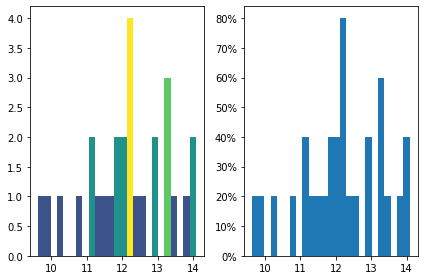

In [6]:
'Note: visualising distribution'
#plotting values across 28 mmbers (1 location, 1 month)
month=random.randint(0,len(array4D[0,:,0,0])-1)
xloc=random.randint(0,len(array4D[0,0,:,0])-1)
yloc=random.randint(0,len(array4D[0,0,0,:])-1)

vars=array4D[:,month,xloc,yloc]

ysort=np.sort(vars)
histoplot(ysort)


In [7]:
'TODO:plot spatial distribution of values, 3D histogram?'

'TODO:plot spatial distribution of values, 3D histogram?'

In [8]:
'Note: coordinate conversion, stored in 1D list of tubles, all (x,y) combinations in order x1,y1 x1,y2, etc'

latlonarray=mp.bulkOSGB36toWGS84(xcoord,ycoord)

In [9]:
mp.PointstoGeojson(latlonarray,foldername="MaxTemp_Monthly_UK",fname='point_coordinates.geojson')

In [10]:
p90_over=var_counter(p90_array,threshold=15,periodiser=20)

In [11]:
squares_array=mp.buildsqrBNG(xcoord,ycoord)

'NOTE:counter produces correct array but not overlayed correcly over squares'
flat_p90_over=mp.PolystoGeojson(squares_array,p90_over, foldername="MaxTemp_Monthly_UK")

In [80]:
dataObject1=DataO.DataObject(title='60_Monthly_MeanTemp_2022-2100_UK',varname='MeanTemp',sres=60,tres='monthly',fdname='60_Monthly_MeanTemp_2022-2100_UK',fdpath="../3_Raw_Data/60_Monthly_MeanTemp_2022-2100_UK",respath='../6_Results/data/')
dataObject2=DataO.DataObject(title='60_Monthly_Rain_2022-2100_UK',varname='Rain',sres=60,tres='monthly',fdname='60_Monthly_Rain_2022-2100_UK',fdpath="../3_Raw_Data/60_Monthly_Rain_2022-2100_UK",respath='../6_Results/data/')


In [116]:
dataObject1.run_stats(KStest=False,stats=True,tp_90=True)
dataObject1.set_threshold(20)
dataObject1.counter(20)
p90=dataObject1.p90_array
'TODO: test counter with home made arrays'

In [114]:
counter_array=dataObject1.counter_array

In [86]:
dataObject2.run_stats(KStest=True,stats=True,tp_90=True)
print(dataObject2.KS)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/lib/npyio.py:713: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)


True


In [100]:
firstMap=MapO.MapObject('60_Monthly_map',dataObject1,"../6_Results/Maps")

firstMap.geojson_write('test')

In [130]:
'Counter testing module'
zero_array=np.zeros(np.shape(p90))
dataObject_test=dataObject1
dataObject_test.set_threshold(20)
dataObject_test.p90_array=zero_array
dataObject_test.counter(periodiser=20)
counter_array_test=dataObject_test.counter_array
flat_counter_array_test=dataObject_test.flat_array(counter_array_test)

for array in flat_counter_array_test:
    for element in array:
        assert element.all()==0, "element is non 0"


ones_array=np.ones(np.shape(p90))
dataObject_test.p90_array=ones_array
dataObject_test.set_threshold(1)

dataObject_test.counter(periodiser=20)
counter_array_test=dataObject_test.counter_array
flat_counter_array_test=counter_array_test.flatten('F')
#flat_counter_array_test=dataObject_test.flat_array(counter_array_test)

for element in flat_counter_array_test:
        assert element==240, "element is non 240, is " +str(element)




AssertionError: element is non 240, is 